# Simulations 

Scott Cohn

Apr 2020

Stat 535

In [2]:
import os
import sys
import random

sys.path.insert(0, 'stat535/lib/')

from Game import *
from sim_funcs import *

## Hypothesis 2

A high initial Gini will lead to a high variance of wealth.

In [3]:
# set seed

random.seed(535)

In [4]:
# init game with small Gini

numAgents = 100
mu = 2 
giniArr = [0.7, 0.9]
numSims = 25

In [5]:
# create game instance `g`

g0 = Game(numAgent = numAgents, Gini = giniArr[0], para = 2) # Gini = 0.7
g1 = Game(numAgent = numAgents, Gini = giniArr[1], para = 2) # Gini = 0.9

/Users/scottcohn/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


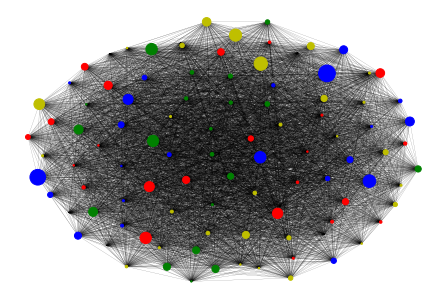

In [6]:
# visualize full connected graph
# nx.draw(g0.network)
# nx.draw(g1.network) 

g0.toImage()

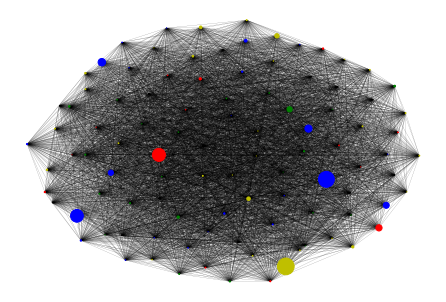

In [111]:
g1.toImage()

Cooperate: 30 Defect: 20 Random: 32 TFT: 18


<BarContainer object of 4 artists>

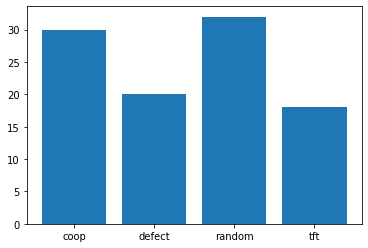

In [112]:
# strategy distro g0
strat_distribution(g0, numAgents)

Cooperate: 17 Defect: 25 Random: 33 TFT: 25


<BarContainer object of 4 artists>

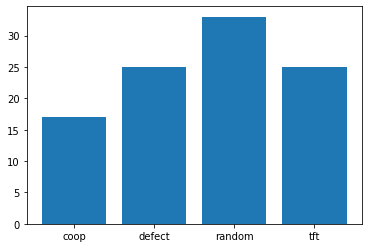

In [113]:
# strategy_dsitribution g1
strat_distribution(g1, numAgents)

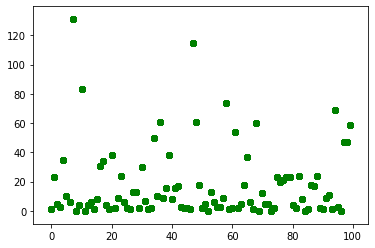

In [114]:
# Initial wealth distribution at time 0 for gini = 0.7
y = g0.wealth_distr(0, '') 
# change '' to '[strat]' to see distro by strategy

for _ in y:
    plt.scatter(range(len(y)), y, c = 'g')

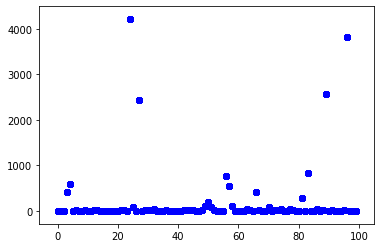

In [127]:
# Initial wealth distribution at time 0 for gini = 0.9
y = g1.wealth_distr(0, '') 
# change '' to '[strat]' to see distro by strategy

for _ in y:
    plt.scatter(range(len(y)), y, c = 'b')

In [7]:
# run simulations for `numSims` times
sim(g0, numSims)
sim(g1, numSims)

In [8]:
g0_df = game_df(g0, numAgents)

g0_df.head()

,id,strategies,assets
0,0,coop,"[1, 249, 289, 309, 317, 317, 317, 317, 317, 31..."
1,1,tft,"[23, 287, 377, 431, 459, 469, 483, 483, 485, 4..."
2,2,defect,"[5, 443, 701, 897, 1057, 1217, 1377, 1543, 169..."
3,3,coop,"[3, 271, 295, 303, 303, 311, 311, 311, 311, 31..."
4,4,coop,"[35, 287, 315, 335, 347, 347, 351, 351, 351, 3..."


In [9]:
g1_df = game_df(g1, numAgents)

g1_df.head()

,id,strategies,assets
0,0,tft,"[1, 237, 289, 319, 341, 341, 347, 347, 347, 34..."
1,1,coop,"[1, 265, 289, 313, 317, 317, 317, 317, 317, 31..."
2,2,coop,"[2, 242, 262, 278, 282, 286, 286, 286, 286, 28..."
3,3,random,"[411, 749, 919, 1059, 1183, 1275, 1377, 1479, ..."
4,4,defect,"[590, 1024, 1244, 1436, 1606, 1768, 1910, 2060..."


In [12]:
# write df to csv
g0_df.to_csv('g7.csv', header=True, index=False) 
g1_df.to_csv('g9.csv', header=True, index=False) 

In [120]:
wealth_memo_g0 = []
wealth_memo_g1 = []
for i in range(numSims):
    wealth_memo_g0.append(g0.wealth_distr(i))
    wealth_memo_g1.append(g1.wealth_distr(i))

In [121]:
# Take wealth array/round and convert to np array
w0 = np.array(wealth_memo_g0)
w1 = np.array(wealth_memo_g1)

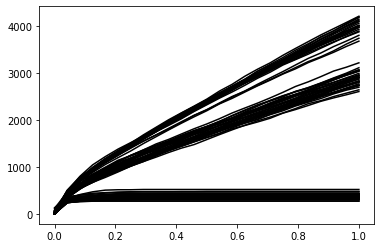

In [122]:
x = np.linspace(0,1,numSims)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, w0, color = 'k')

plt.show()

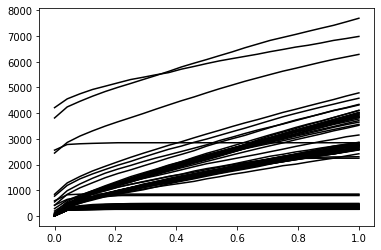

In [123]:
x = np.linspace(0,1,numSims)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, w1, color = 'k')

plt.show()

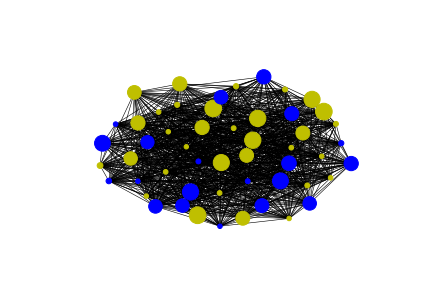

In [124]:
g0.toImage()

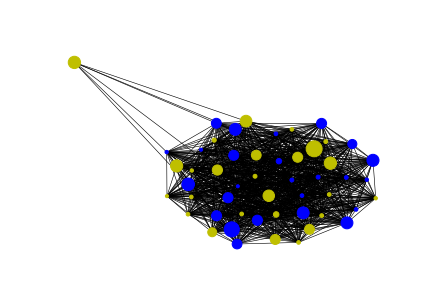

In [125]:
g1.toImage()

Visually, hypothesis seems to hold. Extreme separation in wealth distribution over time. Although, this is less so for a very high Gini of 0.9